In [6]:
from core.trade_service.traders.MA_Trader import MA_Trader
from core.analitics.basic_plots import plot_line_buysell, to_pandas
from datetime import timedelta, datetime
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
model = MA_Trader(mode='sim',
                  period_long=40, 
                  period_short=12,
                 panic= -0.03,
                 interval_group='1h', 
                 interval_source='1h',
                 start_time=datetime.fromisoformat('2020-01-01')
                 )

In [9]:
params = {'period_short': [8,10,12,13,14,15,16,18],
          'period_long': [20,22,23,24,25,26,27,28,29,30,35,40],
          'panic': [-.02, -.025, -.03, -.035, -.04]
        }

In [10]:
gs = GridSearchCV(model, params, cv=2, verbose=10, n_jobs=2)

In [11]:
gs.fit(np.zeros([100,2]),np.ones(100))

Fitting 2 folds for each of 480 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   34.7s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:  2.5min
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  3.4min
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:  5.3min
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  6.8min
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  9.1min
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 11.2min
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed: 14.0min
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed: 16.5min
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed: 19.9min
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed: 22.9min
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed: 26.8min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed: 30.4min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed: 34.8min
[Parallel(

GridSearchCV(cv=2, error_score=nan,
             estimator=<core.trade_service.traders.MA_Trader.MA_Trader object at 0x7f8e8678b210>,
             iid='deprecated', n_jobs=2,
             param_grid={'panic': [-0.02, -0.025, -0.03, -0.035, -0.04],
                         'period_long': [20, 22, 23, 24, 25, 26, 27, 28, 29, 30,
                                         35, 40],
                         'period_short': [8, 10, 12, 13, 14, 15, 16, 18]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [12]:
gs.best_score_

101.1013230515157

In [13]:
gs.best_params_

{'panic': -0.04, 'period_long': 25, 'period_short': 14}

In [14]:
gs.cv_results_

{'mean_fit_time': array([32.0878644 , 28.75085652, 28.91263437, 29.11497712, 28.31827617,
        28.27256846, 27.93150735, 28.67021585, 27.98702681, 28.35121441,
        28.50892115, 28.6889509 , 28.45371139, 28.9766115 , 29.15685165,
        28.55344296, 28.55260944, 28.37858939, 28.66228497, 28.7283535 ,
        28.75363994, 30.10415351, 32.65264297, 29.18321836, 28.92525363,
        28.97042894, 28.81792831, 28.59838438, 28.83582151, 28.82969308,
        28.86259997, 28.81718409, 29.11081207, 28.8518734 , 29.0322262 ,
        28.73170102, 29.17931855, 30.92899787, 31.69896603, 29.19208503,
        29.17437017, 29.30664587, 29.120399  , 29.36375153, 29.13562417,
        29.42841268, 29.23392558, 29.46194279, 29.36846018, 29.57569575,
        29.52531552, 30.04561508, 30.45876443, 29.76122856, 29.89527476,
        29.82177949, 29.72346687, 29.84867549, 30.29240811, 30.19371152,
        29.88465142, 30.17629147, 30.62102103, 30.57894635, 30.14983392,
        30.2132802 , 30.064026  , 

In [34]:
model = MA_Trader(mode='sim',
                  period_long=25, 
                  period_short=14,
                 panic= -0.04,
                 interval_group='1h', 
                 interval_source='1h',
                 start_time=datetime.fromisoformat('2020-01-01')
                 )
model.evaluate()

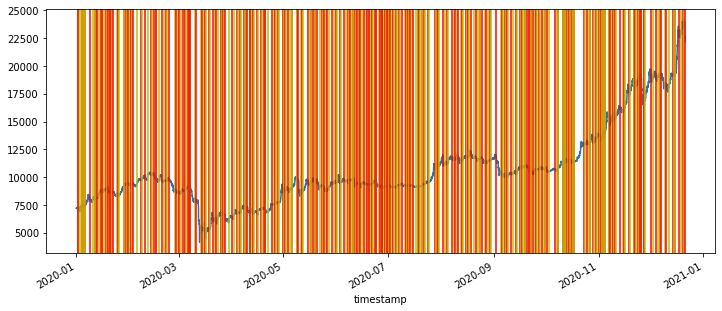

In [39]:
plot_line_buysell(model)

In [42]:
model.score(1,1)

115.49274773163124

In [43]:
res = to_pandas(model)

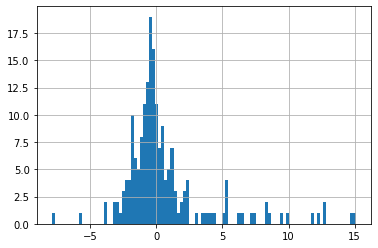

In [45]:
res.gain.hist(bins=100)

In [52]:
import matplotlib.pylab as plab
import matplotlib.pyplot as plt
import numpy as np
np.squeeze

<function numpy.squeeze(a, axis=None)>

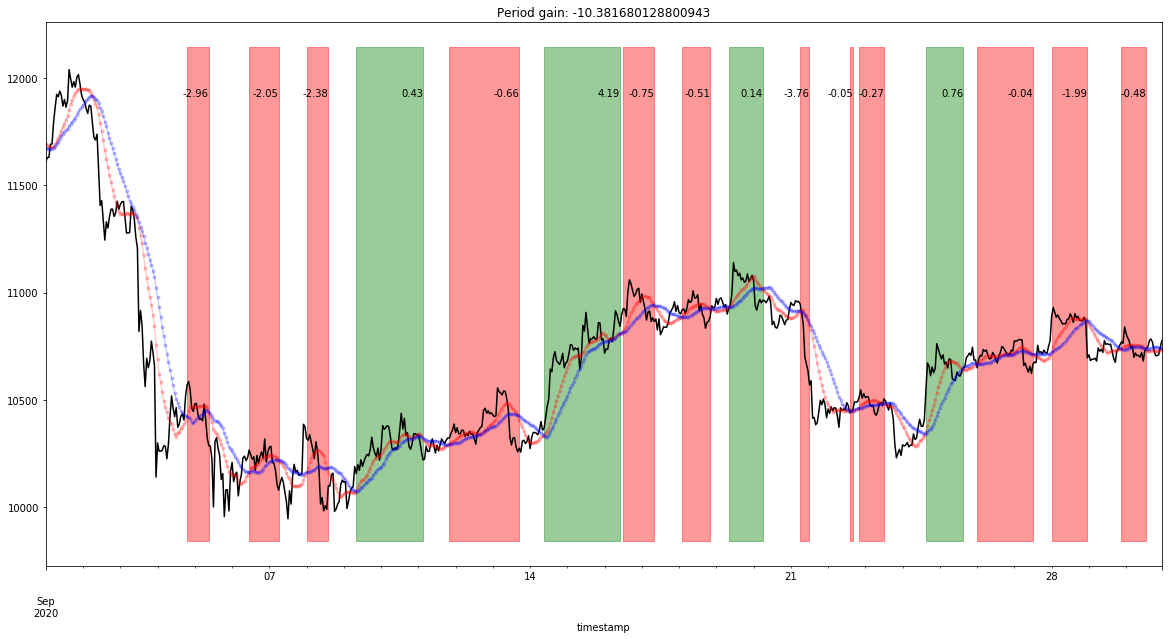

In [111]:
month = 9
result_pd = to_pandas(model)
result_pd = result_pd[result_pd.start_datetime.dt.month == month]
data = model.data_mgr.get_data()
data.loc[:,'malong'] = model.ma_long.evaluate(data)
data.loc[:,'mashort'] = model.ma_short.evaluate(data)
data = data[data.index.month==month]
data.close.plot(figsize=(20,10), color='black')
data.mashort.plot(marker='.', color='r', alpha=.2)
algo = data.malong.plot(marker='.', color='b', alpha=.2)
y_min, y_max = algo.get_ylim()
for init, end, gain in zip(result_pd.start_datetime, result_pd.end_datetime, result_pd.gain):
    color = 'red' if gain < 0 else 'green'
    plt.fill_between(data[init:end].index,y_min,y_max, color=color, alpha=0.4)
    pl.text(end, y_min+(y_max-y_min)*0.9, s=round(gain,2), horizontalalignment='right')
    plt.title('Period gain: {}'.format(result_pd.gain.sum()))

(12762.438, 24535.122)

In [49]:
result_pd

,start_datetime,start_price,end_datetime,end_price,gain
181,2020-12-02 16:00:00,18856.2,2020-12-04 07:00:00,19283.9,2.02007
182,2020-12-05 13:00:00,18983.1,2020-12-06 15:00:00,19125.8,0.546858
183,2020-12-07 01:00:00,19293.1,2020-12-07 18:00:00,18939.7,-2.06768
184,2020-12-09 21:00:00,18519.4,2020-12-10 12:00:00,18210,-1.90082
185,2020-12-11 23:00:00,18036.5,2020-12-14 05:00:00,19085.5,5.30181
186,2020-12-14 19:00:00,19175.9,2020-12-15 17:00:00,19399.5,0.954016
187,2020-12-15 19:00:00,19530.4,2020-12-18 07:00:00,23056,15.1068
188,2020-12-19 05:00:00,22958,2020-12-20 11:00:00,23553,2.32883
189,2020-12-20 20:00:00,24172.2,2020-12-21 10:00:00,22446,-7.89842


In [196]:
model.env.last_timestamp

Timestamp('2020-11-04 17:00:00')

In [112]:
pd.DataFrame(serie)

,close
timestamp,
2020-05-01 00:00:00,8707.51
2020-05-01 01:00:00,8662.61
2020-05-01 02:00:00,8726.36
2020-05-01 03:00:00,8675.35
2020-05-01 04:00:00,8791.59
...,...
2020-05-31 19:00:00,9514.74
2020-05-31 20:00:00,9506.60
2020-05-31 21:00:00,9469.35
